In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/Colab"

/content/drive/My Drive/Colab


In [ ]:
ls 

 hcvdat0.csv         my_picture.png    train.csv
 HRDataset_v14.csv   titanic.csv      'Wetland Data-1.csv'
 my_picture.jpg      total_cases.csv   World_GDP.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv('Wetland Data-1.csv')
df.head()

,year,month,Evapotranspiration,LeafAreaIndex,NetPrimaryProductivity,TotalPrecipitation,SoilWaterContent,AverageTemperature,Transpiration,orog_pm1,orog_pm5,SoilCarbon,WetLandFraction
0,2000,1,107.82,6.28,128.8,69,249.58,24.1,66.76,13.26743,69.076363,9723.9,0.009042
1,2000,2,105.95,5.94,105.3,180,248.08,22.5,52.14,13.26743,69.076363,9723.9,0.009184
2,2000,3,93.76,5.45,103.0,101,302.63,20.1,45.40,13.26743,69.076363,9723.9,0.008972
3,2000,4,51.37,3.99,57.0,79,313.31,17.2,23.20,13.26743,69.076363,9723.9,0.008195
4,2000,5,24.00,3.55,32.5,190,347.04,12.2,10.98,13.26743,69.076363,9723.9,0.049571


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    156 non-null    int64  
 1   month                   156 non-null    int64  
 2   Evapotranspiration      156 non-null    float64
 3   LeafAreaIndex           156 non-null    float64
 4   NetPrimaryProductivity  156 non-null    float64
 5   TotalPrecipitation      156 non-null    int64  
 6   SoilWaterContent        156 non-null    float64
 7   AverageTemperature      156 non-null    float64
 8   Transpiration           156 non-null    float64
 9   orog_pm1                156 non-null    float64
 10  orog_pm5                156 non-null    float64
 11  SoilCarbon              156 non-null    float64
 12  WetLandFraction         156 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 16.0 KB


In [ ]:
df.describe()

,year,month,Evapotranspiration,LeafAreaIndex,NetPrimaryProductivity,TotalPrecipitation,SoilWaterContent,AverageTemperature,Transpiration,orog_pm1,orog_pm5,SoilCarbon,WetLandFraction
count,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,1.560000e+02,1.560000e+02,156.000000,156.000000
mean,2006.000000,6.50000,62.707949,4.266346,70.491026,86.070513,326.447628,16.489744,32.388718,1.326743e+01,6.907636e+01,9772.507692,0.043811
std,3.753708,3.46317,38.046481,1.323215,57.261997,67.529216,33.462869,5.127046,20.724068,5.346233e-15,1.425662e-14,85.598201,0.034009
min,2000.000000,1.00000,8.930000,1.820000,-70.900000,1.000000,207.750000,6.800000,4.550000,1.326743e+01,6.907636e+01,9606.200000,0.000000
25%,2003.000000,3.75000,25.057500,3.062500,27.925000,31.000000,313.325000,12.075000,12.462500,1.326743e+01,6.907636e+01,9723.900000,0.010930
50%,2006.000000,6.50000,57.240000,4.260000,76.750000,70.500000,340.260000,16.500000,29.250000,1.326743e+01,6.907636e+01,9787.600000,0.041618
75%,2009.000000,9.25000,95.830000,5.505000,117.250000,126.250000,350.812500,21.600000,49.862500,1.326743e+01,6.907636e+01,9841.700000,0.072694
max,2012.000000,12.00000,144.700000,6.490000,166.700000,324.000000,360.440000,25.000000,74.970000,1.326743e+01,6.907636e+01,9874.200000,0.101572


Checking the correlation of Evapotranspiration, the output variable, with all the other variables using seaborn pairplot. 

In [ ]:
df.columns

Index(['year', 'month', 'Evapotranspiration', 'LeafAreaIndex',
       'NetPrimaryProductivity', 'TotalPrecipitation', 'SoilWaterContent',
       'AverageTemperature', 'Transpiration', 'orog_pm1', 'orog_pm5',
       'SoilCarbon', 'WetLandFraction'],
      dtype='object')

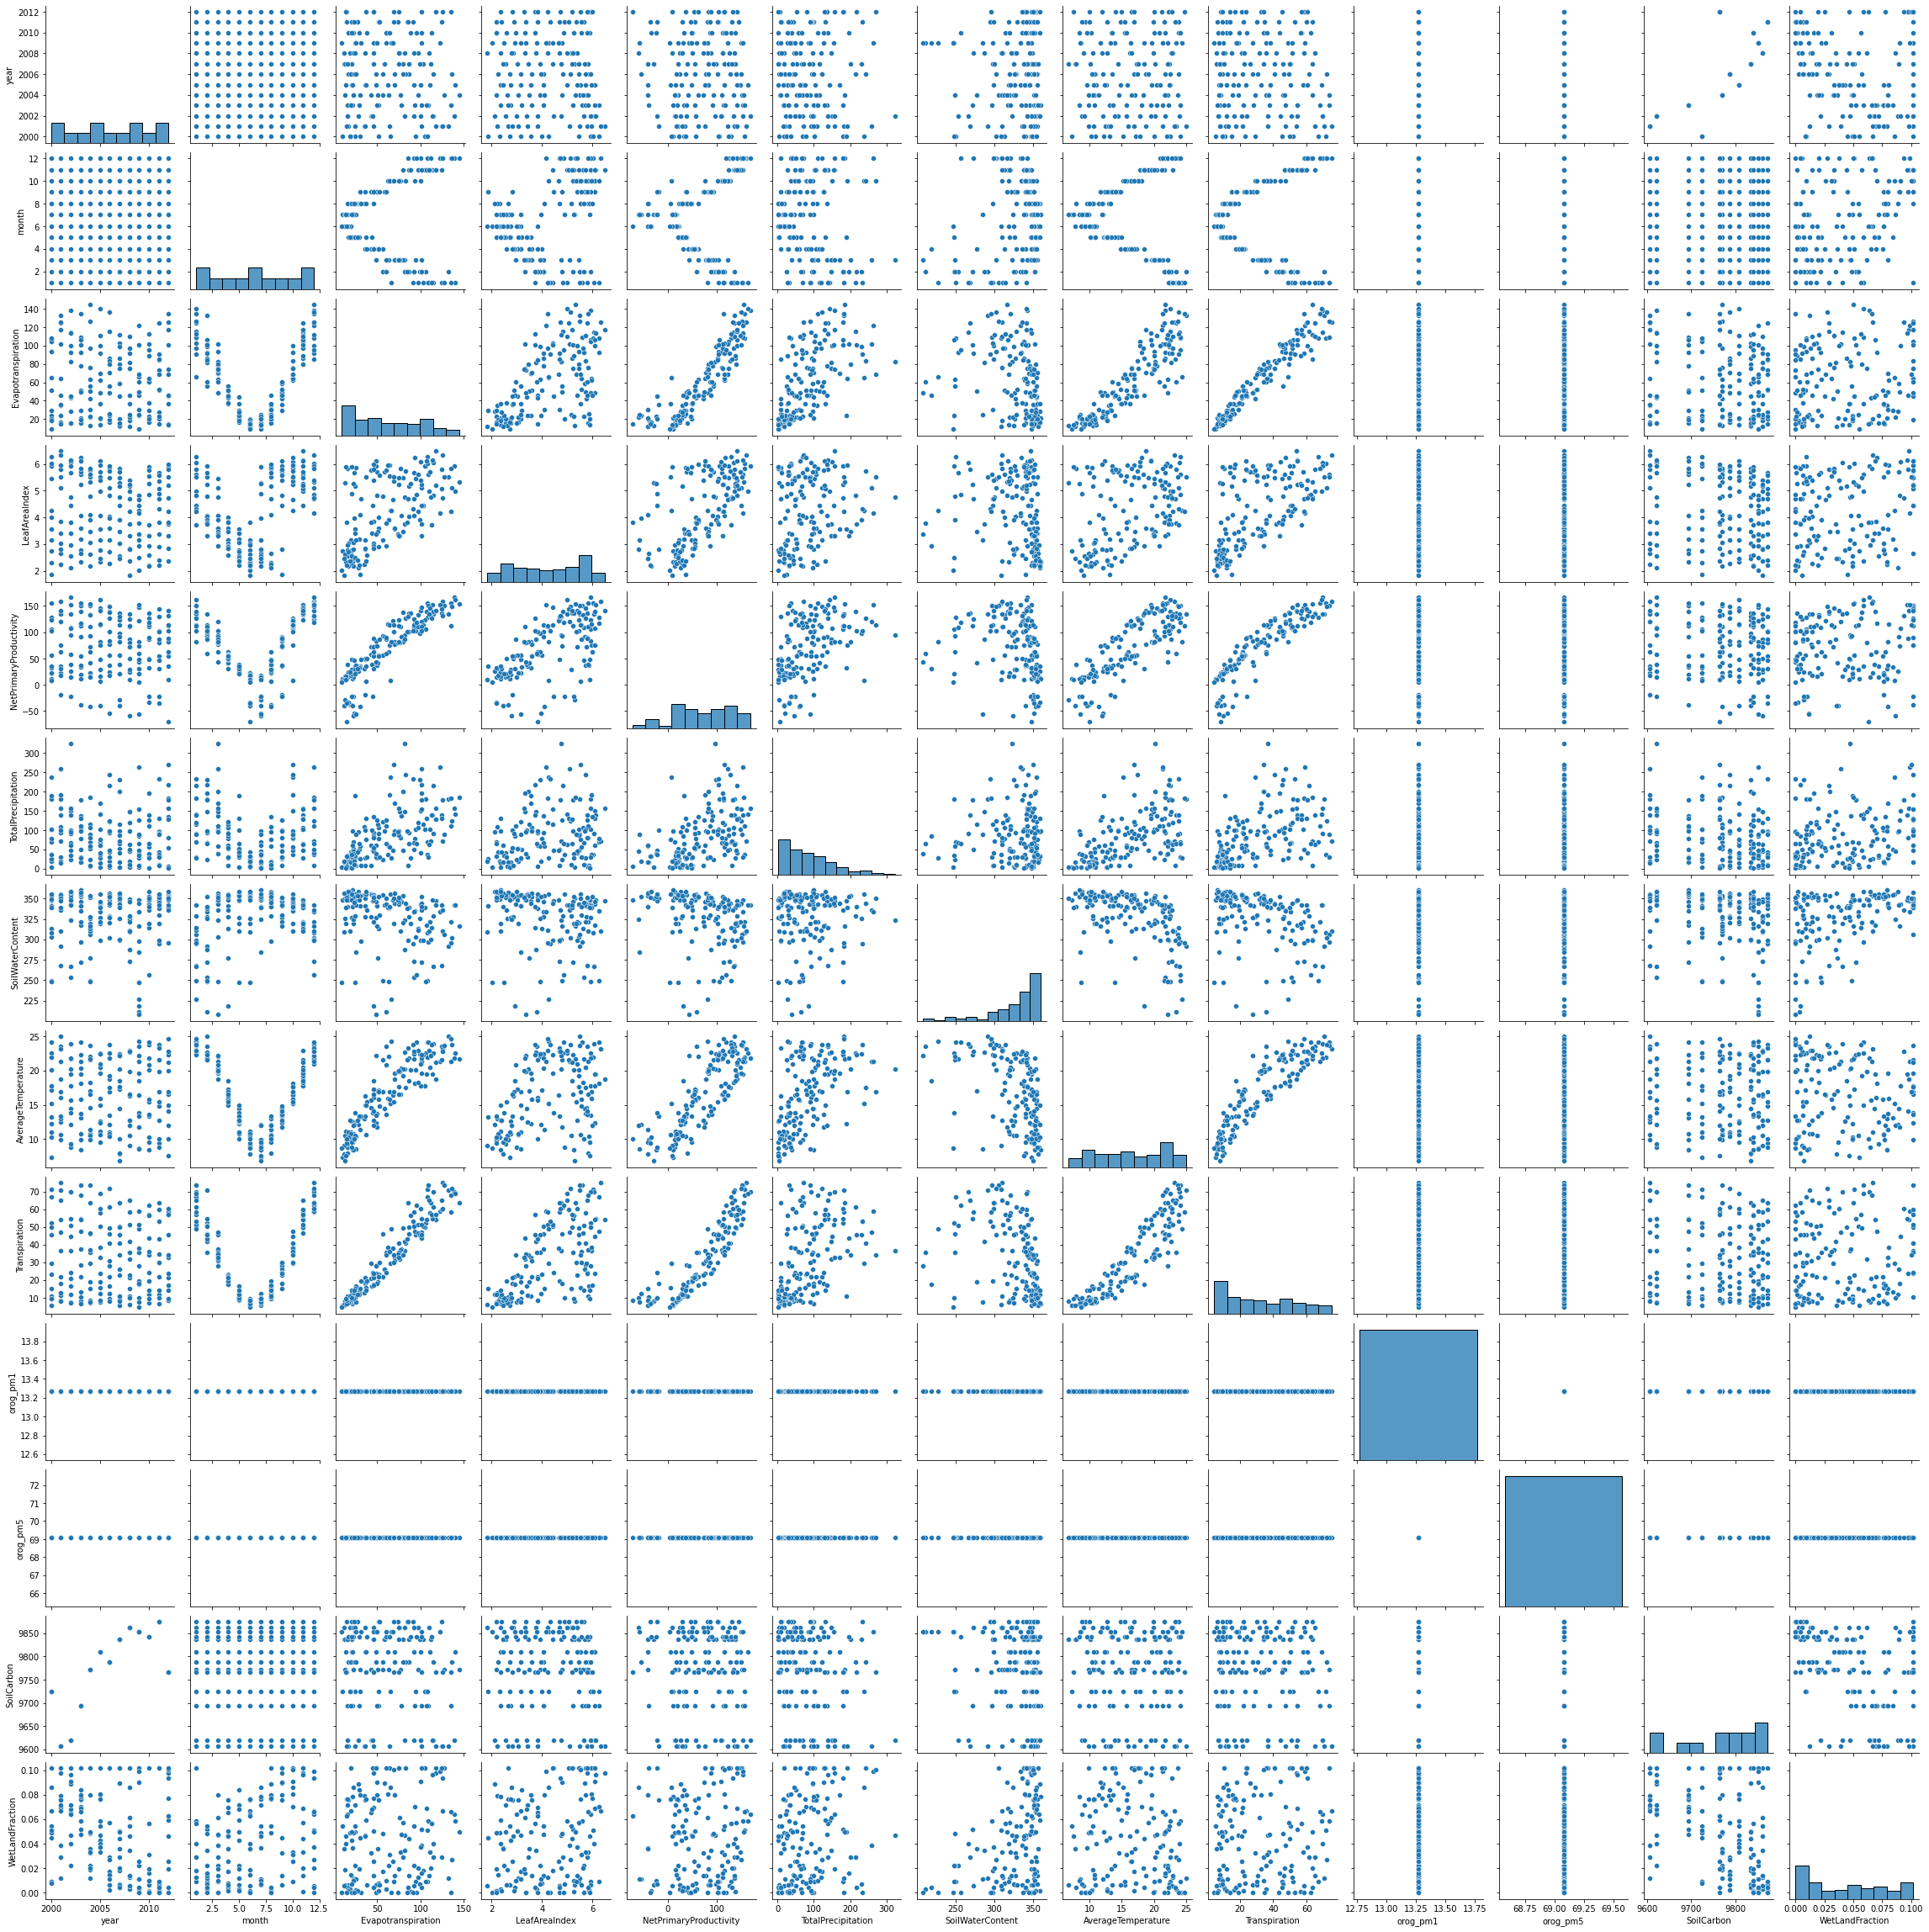

In [ ]:
sns.pairplot(data = df )

Confirming correlation with the use of heat map to know the coefficients

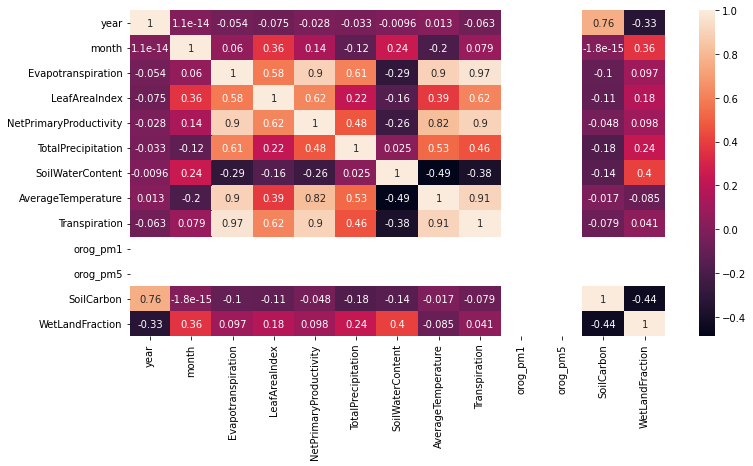

In [ ]:
df.corr()
plt.figure(figsize =(12, 6))
sns.heatmap(df.corr(), annot = True)

Choosing suitable independent variable

In [ ]:
y = df[['Evapotranspiration']]
y.head()

,Evapotranspiration
0,107.82
1,105.95
2,93.76
3,51.37
4,24.00


In [ ]:
X = df[['Transpiration']]
X.head()

,Transpiration
0,66.76
1,52.14
2,45.40
3,23.20
4,10.98


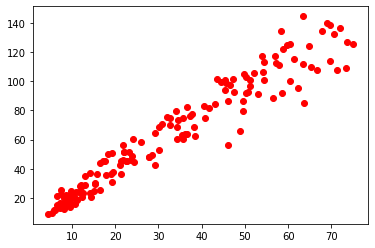

In [ ]:
plt.scatter(X, y, color = 'red')

Modelling Train_Test_Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(109, 1) (109, 1) (47, 1) (47, 1)


In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[1.81991077]]
Intercept: [4.21892264]


Text(0, 0.5, 'Transpiration')

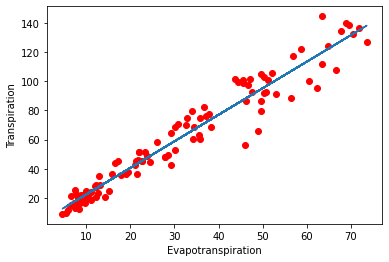

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, X_train*regr.coef_ + regr.intercept_)
plt.xlabel('Evapotranspiration')
plt.ylabel('Transpiration')

In [ ]:
from sklearn.metrics import r2_score
y_pred = regr.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred-y_test)**2))
print("R2-score: %.2f" % r2_score(y_pred,y_test))

Mean absolute error: 9.17
Residual sum of squares (MSE): 141.53
R2-score: 0.91


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


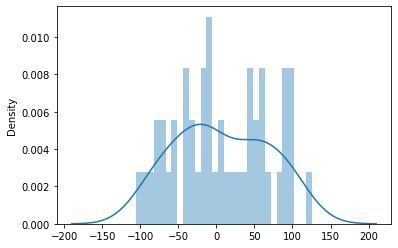

In [ ]:
sns.distplot((y_pred-y_test),bins=30)

(0.0, 170.0)

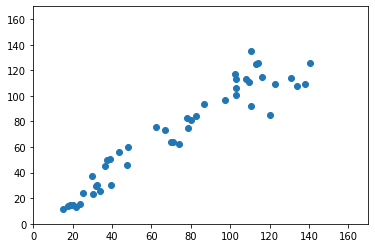

In [ ]:
plt.scatter(y_pred, y_test)
plt.ylim([0,170])
plt.xlim([0,170])

Checking to see if developing a multiple linear regression model, considering all the other inputs will improve the model.
 

In [ ]:
df.columns

Index(['year', 'month', 'Evapotranspiration', 'LeafAreaIndex',
       'NetPrimaryProductivity', 'TotalPrecipitation', 'SoilWaterContent',
       'AverageTemperature', 'Transpiration', 'orog_pm1', 'orog_pm5',
       'SoilCarbon', 'WetLandFraction'],
      dtype='object')

In [ ]:
X=df[['NetPrimaryProductivity','AverageTemperature','Transpiration']]
X.head()

,NetPrimaryProductivity,AverageTemperature,Transpiration
0,128.8,24.1,66.76
1,105.3,22.5,52.14
2,103.0,20.1,45.40
3,57.0,17.2,23.20
4,32.5,12.2,10.98


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(109, 3) (109, 1) (47, 3) (47, 1)


In [ ]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)

Coefficients: [[0.08934971 0.64707373 1.41768717]]
Intercept: [-0.36920488]


In [ ]:
from sklearn.metrics import r2_score
y_pred2 =  lm.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred2-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred2-y_test)**2))
print("R2-score: %.2f" % r2_score(y_pred2,y_test))

Mean absolute error: 6.85
Residual sum of squares (MSE): 78.31
R2-score: 0.94


(0.0, 170.0)

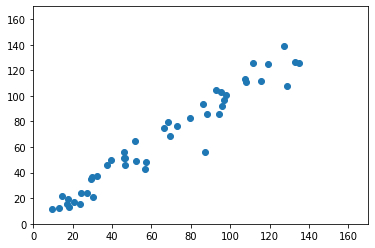

In [ ]:
plt.scatter(y_pred2, y_test)
plt.ylim([0,170])
plt.xlim([0,170])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


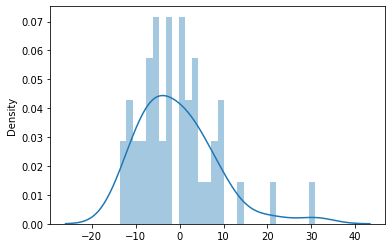

In [ ]:
sns.distplot((y_pred2-y_test),bins=30)

From the result gotten above, including more than one variable improved the performance of the model